<h4>--楽曲分析用のテンプレート--</h4>

1.</br>
wave,mp3等をロード </br>
時系列*音の大きさのデータを取得する

In [1]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

music_name = "PAYH/TO/FILE"

In [2]:
y, sr = librosa.load(
    music_name,
    sr=4410, # サンプリング周波数
    offset=0.0, # 開始時間
    duration=120.0 # 終了時間
)

print("y:", y)
print("sr:", sr)

y: [ 0.          0.          0.         ... -0.16165397 -0.1355767
 -0.24099746]
sr: 4410


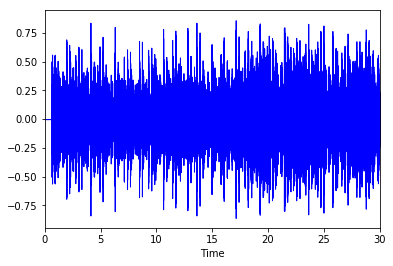

In [3]:
# wave形式でプロット
librosa.display.waveplot(y, sr=sr, color='blue')

2.</br>
データをフーリエ変換</br>
周波数*音の大きさのデータを取得する

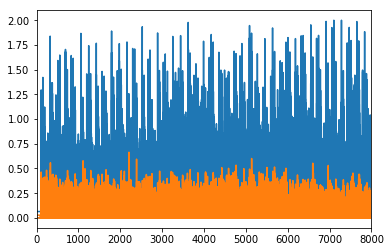

In [4]:
import scipy.io.wavfile

rate, data = scipy.io.wavfile.read(music_name)

data = data / 32768


fft = np.abs(np.fft.fft(data))    
freqList = np.fft.fftfreq(data.shape[0], d=1.0/rate) 

#データプロット
plt.plot(freqList, fft)
plt.xlim(0, 8000)
plt.show()



[0.         0.         0.         ... 0.23721313 0.30682373 0.24136353]
88200
44100


Text(0,0.5,'amplitude spectrum')

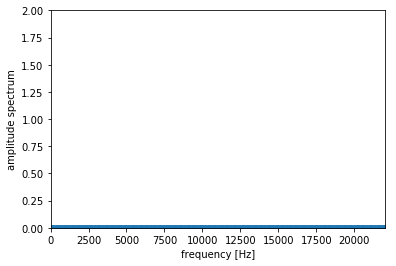

In [5]:
import wave

wf = wave.open(music_name , "r" )
fs = wf.getframerate()  # サンプリング周波数
x = wf.readframes(fs)
# print(x)

x = np.frombuffer(x, dtype= "int16") / 32768.0  # -1 - +1に正規化した波形

print(x)
print(len(x))
print(fs)
wf.close()

start = 0        # サンプリングする開始位置
N = 256          # サンプル数

# 離散フーリエ変換
X = [0.0] * N
for k in range(N):
    for n in range(N):
        real = np.cos(2 * np.pi * k * n / N)
        imag = - np.sin(2 * np.pi * k * n / N)
        X[k] += x[start + n] * complex(real, imag)

freqList = [k * fs / N for k in range(N)]    # 周波数のリスト
amplitudeSpectrum = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in X]    # 振幅スペクトル np.abs()

# 振幅スペクトルを描画
plt.plot(freqList, amplitudeSpectrum, marker='o', linestyle='-')
plt.axis([0, fs/2, 0, 2])    # ナイキスト周波数まで表示すれば十分
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude spectrum")


<h4>スペクトログラムを表示</h4>

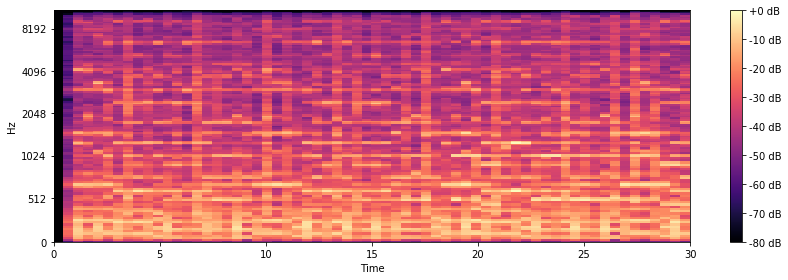

In [6]:
S = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_mels=128,
    hop_length=2068,
    n_fft=2048 
)

log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(
data=log_S,
    sr=sr,
    hop_length=2068,
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

<h4>コード解析</h4>

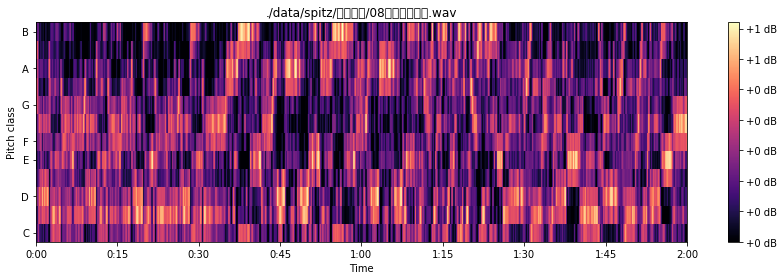

In [7]:
y, sr = librosa.load(
        music_name,
        sr=44100,
        offset=0.0,
        duration=120.0
    )

y_harmonic, y_percussive = librosa.effects.hpss(y)

C = librosa.feature.chroma_cens(
    y=y_harmonic,
    sr=sr
)

plt.figure(figsize=(12, 4))
librosa.display.specshow(
    data=C,
    sr=sr,
    x_axis='time',
    y_axis='chroma'
)
plt.title(music_name)
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()